# Assignment  1  

## <center>FIT5145 - Introduction to Data Science<center>

By Maryam Mahmoodi

Monash ID: 30155843

Monash username: mmah0021@student.monash.edu


The current notebook will cover the 1st task of assignment 1.


## <center>Task A: Investigating Population and Gender Equality in Education<center>

<br>

## Preparation

Import relevant python libraries for data wrangling and analysis
<br>
<br>

In [165]:
!pip install wget
!pip install motionchart
!pip install pyperclip

In [166]:
import pandas as pd
import datetime
from motionchart.motionchart import MotionChart
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy.stats import linregress
from sklearn import preprocessing
from datetime import datetime, timedelta
import plotly
import plotly.plotly as py
import plotly.tools as tls

## Importing files
Importing the CSV files into Jupyter notebook to prepare the data for further analysis

In [167]:
# The first step is to import the raw data

# 1. Income
in_df0 = pd.read_csv('Income.csv')

# 2. Population
pp_df0 = pd.read_csv('Population.csv')

# 3. InsuranceRate 
ins_df0 = pd.read_csv('InsuranceRates.csv')

# 4. GenderEquality 
ge_df0 = pd.read_csv('GenderEquality.csv')


In [168]:
# Converting the Income.csv file into a dataframe format for the analysis purpose
in_df = pd.DataFrame(in_df0) 

# Highlevel view on Income Index
in_df.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
3,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
4,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


In [169]:
# Converting the Population.csv file into a dataframe format for the analysis purpose
pp_df = pd.DataFrame(pp_df0)

# Highlevel view on Population Index
pp_df.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1,1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
2,1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
3,1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
4,1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


In [170]:
# Converting the Insurance.csv file into a dataframe format for the analysis purpose
ins_df = pd.DataFrame(ins_df0)

# Highlevel view on Insurance Index
ins_df.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


In [171]:
# Converting the GenderEquality.csv file into a dataframe format for the analysis purpose 
ge_df1 = pd.DataFrame(ge_df0)

# Highlevel view on GenderEquality Index
ge_df1.head()

,geo,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,15.4,15.8,15.4,15.6,15.9,16.1,16.4,16.6,16.2,...,21.5,21.9,22.2,22.3,22.6,22.9,23.1,23.4,23.5,23.7
1,Albania,87.4,87.9,88.3,88.9,89.2,89.7,90.2,90.6,91.0,...,100.0,101.0,101.0,101.0,101.0,102.0,102.0,102.0,102.0,103.0
2,Algeria,90.0,90.3,90.2,90.5,90.4,90.4,90.4,90.6,90.3,...,87.6,88.0,88.3,88.7,89.0,89.4,89.7,90.0,90.5,90.8
3,Andorra,97.0,97.4,97.8,98.1,98.4,98.8,99.1,99.5,99.8,...,105.0,105.0,105.0,105.0,105.0,105.0,106.0,106.0,106.0,106.0
4,Angola,51.3,51.4,51.9,52.3,52.8,53.2,53.4,53.8,54.3,...,68.5,68.9,69.5,70.1,70.5,71.2,71.7,72.2,72.9,73.3


## <span style="color:blue">Data wrangling<span>


The extracted data need to be wrangled in order to be prepared for analysis. 

- Make sure all data are structured and formatted aligned with the requirement of analysis.

### Transpose
- GenderEquality dataframe is transposed thus countries will be placed each column.
- Transposing dataframes will replace the items on x axis with the items on y axis.

In [172]:
# Transposing the GenderEquality dataframe
ge_df1 = ge_df0.transpose()

# Highlevel view on GenderEquality Index
ge_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
geo,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1970,15.4,87.4,90,97,51.3,103,96.7,91.7,95.2,85,...,90.6,96.8,100,87.8,75.9,92.9,79.9,11.2,58.2,69.6
1971,15.8,87.9,90.3,97.4,51.4,103,97.2,92.1,95.5,85.4,...,91,96.8,101,88.3,76.4,93.5,80.5,11.3,58.9,70
1972,15.4,88.3,90.2,97.8,51.9,104,97.5,92.5,95.7,85.9,...,91.4,97,101,88.8,76.9,93.8,81.1,11.4,59.4,70.5
1973,15.6,88.9,90.5,98.1,52.3,104,97.8,92.9,96.1,86.4,...,91.8,97.1,101,89.1,77.4,94.3,81.3,11.9,60.1,71.1


### Index reset

In this stage, resetting the index which is a function of formatting to index the columns based on 'country names'.


In [173]:
# The index of GenderEquality dataframe is reset. 
ge_df2 = ge_df1.reset_index()

# Highlevel view on GenderEquality Index
ge_df2.head()

,index,0,1,2,3,4,5,6,7,8,...,177,178,179,180,181,182,183,184,185,186
0,geo,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1,1970,15.4,87.4,90,97,51.3,103,96.7,91.7,95.2,...,90.6,96.8,100,87.8,75.9,92.9,79.9,11.2,58.2,69.6
2,1971,15.8,87.9,90.3,97.4,51.4,103,97.2,92.1,95.5,...,91,96.8,101,88.3,76.4,93.5,80.5,11.3,58.9,70
3,1972,15.4,88.3,90.2,97.8,51.9,104,97.5,92.5,95.7,...,91.4,97,101,88.8,76.9,93.8,81.1,11.4,59.4,70.5
4,1973,15.6,88.9,90.5,98.1,52.3,104,97.8,92.9,96.1,...,91.8,97.1,101,89.1,77.4,94.3,81.3,11.9,60.1,71.1


### Rename using .iloc function and re-index

- The iloc indexer is used for location based on indexing by position.

In [174]:
# GenderEquality data need to be 'located' and 'renamed' to convey correct meaning. 
headers = ge_df2.iloc[0]

# Based on the selection, the column header is renamed
new_df = pd.DataFrame(ge_df2.values[1:], columns = headers)
ge_df = new_df.rename(columns ={'geo': 'Year'})

# Highlevel view on GenderEquality Index
ge_df.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1970,15.4,87.4,90,97,51.3,103,96.7,91.7,95.2,...,90.6,96.8,100,87.8,75.9,92.9,79.9,11.2,58.2,69.6
1,1971,15.8,87.9,90.3,97.4,51.4,103,97.2,92.1,95.5,...,91,96.8,101,88.3,76.4,93.5,80.5,11.3,58.9,70
2,1972,15.4,88.3,90.2,97.8,51.9,104,97.5,92.5,95.7,...,91.4,97,101,88.8,76.9,93.8,81.1,11.4,59.4,70.5
3,1973,15.6,88.9,90.5,98.1,52.3,104,97.8,92.9,96.1,...,91.8,97.1,101,89.1,77.4,94.3,81.3,11.9,60.1,71.1
4,1974,15.9,89.2,90.4,98.4,52.8,104,98.3,93.5,96.3,...,92.2,97.2,102,89.6,77.9,94.8,81.9,12,60.8,71.5



## A1. Investigating the Gender Equality Data

- The plot below shows the gender ratio(women% men) in schools for Australia and China and United States overtime.

i.  From the given data set, it is found that in the given time period the maximum and minimum values for the gender ratio is 103 and 95.2.

In [175]:
# Selected 3 countries to ceate the plot box
ge_only = ge_df[['Year','Australia','China', 'United States']]


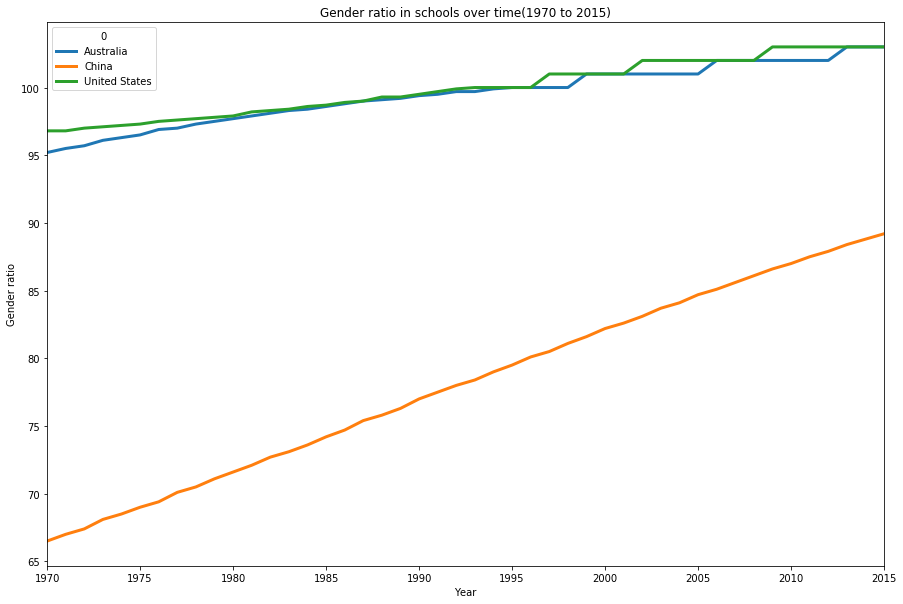

In [176]:
# Creat the plot box
ge_only.plot(x= 'Year', lw= 3, title ='Gender ratio in schools over time(1970 to 2015)', figsize =(15,10))
plt.xlabel('Year')
plt.ylabel('Gender ratio')
plt.show()

In [177]:
# Maximum valus for gender ratio in Australia over time period
ge_AU_only = ge_df[['Year','Australia']]

print(ge_AU_only[ge_only.Australia == ge_AU_only.Australia.max()])

0   Year Australia
43  2013       103
44  2014       103
45  2015       103


The result above state that the maximum ratio( women % men) in school for Australia is 103.

In [178]:
# Minimum valus for gender ratio in Australia over time period
print(ge_AU_only[ge_only.Australia == ge_AU_only.Australia.min()])

0  Year Australia
0  1970      95.2


The result above state that the minimum ratio( women % men) in school for Australia is 95.2.

ii. From the analysis of the above plots it can be stated that, the USA and Australia had the similar trend in the growth of the gender ratio in the school compare to China according to the data available in the file.
From the above plots, it is evident that there is sudden and increased growth in the geneder ratio from the year 2000 that continued until 2015.


In [179]:
 # Maximum valus for gender ratio in Australia, China and United State over time period
ge_only = ge_df[['Year','Australia','China', 'United States']]

print(ge_only[ge_only.Australia == ge_only.Australia.max()])
print(ge_only[ge_only.Australia == ge_only.Australia.min()])

0   Year Australia China United States
43  2013       103  88.4           103
44  2014       103  88.8           103
45  2015       103  89.2           103
0  Year Australia China United States
0  1970      95.2  66.5          96.8


## Task A2. Visualising the Relationship over Time

## Prepration of Motion Chart

For the visulalisation skills, is required to make some adjustment to show visualise data as much as posible accurate and well designed.


In [180]:
# Categorising the data for a better view and better understanding on the data structure and data integrity.
gender = ge_df.melt(id_vars=['Year'], var_name='Country', value_name= 'GenderRatio')
income = in_df.melt(id_vars=['Year'], var_name='Country', value_name= 'Income')
population = pp_df.melt(id_vars=['Year'], var_name='Country', value_name= 'population')

In [181]:
gender.dtypes

Year           object
Country        object
GenderRatio    object
dtype: object

In [182]:
# Convert the year from 'object' to 'int' for letting us to merge with other tables
gender [['Year']] = gender [['Year']].astype('int')

In [183]:
# merge two tables population and income by outjoin 

merge1 = pd.merge(population, income, on=['Year', 'Country'], how='outer')
merge1.head()

,Year,Country,population,Income
0,1800,Afghanistan,3280000,603.0
1,1801,Afghanistan,3280000,603.0
2,1802,Afghanistan,3280000,603.0
3,1803,Afghanistan,3280000,603.0
4,1804,Afghanistan,3280000,603.0


In [184]:
# Join the prevoius table by outjoin with gender table
merge = pd.merge(merge1, gender, on=['Year', 'Country'], how='outer')
merge.head()

,Year,Country,population,Income,GenderRatio
0,1800,Afghanistan,3280000,603.0,NaN
1,1801,Afghanistan,3280000,603.0,NaN
2,1802,Afghanistan,3280000,603.0,NaN
3,1803,Afghanistan,3280000,603.0,NaN
4,1804,Afghanistan,3280000,603.0,NaN


In [185]:
# Drop all NaN values
consolidated_df = merge.dropna(0)

In [186]:
consolidated_df.head()

,Year,Country,population,Income,GenderRatio
170,1970,Afghanistan,11100000,1180.0,15.4
171,1971,Afghanistan,11400000,1100.0,15.8
172,1972,Afghanistan,11700000,1050.0,15.4
173,1973,Afghanistan,12000000,1150.0,15.6
174,1974,Afghanistan,12300000,1180.0,15.9


In [187]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Creation of MotionChart

At this point, our dataframe is ready to place as the input in the motionchart. For the result, the code below will consume the data based on the data and provide the MotionChart. 

i.  The MotionChart below represent the correlation between Income and Gender ratio in different countries during 1970 to 2015. The Gender ratio is on x-axis and y-axis represent the Income.
Year is selected as the index of the MotionChart also color of the circles differentiates the countries while circle size provide a population for each country.

In [188]:
# The code below defined by column "Year" of the final dataframe. GenderRatio and Income index sit on x and y axis respectively.
mChart = MotionChart(df = consolidated_df, key ='Year', x ='GenderRatio', y ='Income', xscale ='linear', yscale ='linear', 
                     size = 'population', category ='Country')
mChart.to_notebook()

By look at the Motion Chart coould say that:

In 1970 China has the most population and gender ratio is in the middle by growing population income and gender ratio show slow growth until 2015 but some countries like Qatar, Saudi Arabia, Qatar and United Arab Emirates had lots of up and down in Income during this period.

i. Yaman adn Afghanistan are the two countries generally have the lowest gender ratio in schools over this period.

ii. Select Cape Verde and Bolivia for this part.

In [189]:
# Select only capeVerde and bolivia countries from consolidated table

capeVerde = consolidated_df[consolidated_df.Country =='Cape Verde']
bolivia = consolidated_df[consolidated_df.Country =='Bolivia']

# Then concatenate the two selected countries by concat code then converted to panda datafram
compareCountry = pd.concat([capeVerde, bolivia])

In [190]:
capeVerde.head()

,Year,Country,population,Income,GenderRatio
6959,1970,Cape Verde,270000,959.0,66.7
6960,1971,Cape Verde,273000,872.0,67.2
6961,1972,Cape Verde,274000,820.0,67.9
6962,1973,Cape Verde,273000,803.0,68.3
6963,1974,Cape Verde,272000,772.0,68.8


In [191]:
bolivia.head()

,Year,Country,population,Income,GenderRatio
4550,1970,Bolivia,4510000,3660.0,67.7
4551,1971,Bolivia,4600000,3700.0,68.2
4552,1972,Bolivia,4700000,3800.0,68.6
4553,1973,Bolivia,4800000,3960.0,69.3
4554,1974,Bolivia,4900000,4070.0,69.7


In [192]:
compareCountry

,Year,Country,population,Income,GenderRatio
6959,1970,Cape Verde,270000,959.0,66.7
6960,1971,Cape Verde,273000,872.0,67.2
6961,1972,Cape Verde,274000,820.0,67.9
6962,1973,Cape Verde,273000,803.0,68.3
6963,1974,Cape Verde,272000,772.0,68.8
6964,1975,Cape Verde,272000,787.0,69.2
6965,1976,Cape Verde,274000,775.0,69.5
6966,1977,Cape Verde,276000,766.0,70.2
6967,1978,Cape Verde,279000,832.0,70.7
6968,1979,Cape Verde,282000,906.0,71.3


In [193]:
# Creat MotionChart
mChart = MotionChart(df = compareCountry, key ='Year', x ='GenderRatio', y ='Income', xscale ='linear', yscale ='linear', 
                     size = 'population', category ='Country')
mChart.to_notebook()

ii. Bolivia has more population compare to CapeVerde and from 1970-1979 CapeVerde and Bolivia had a very stable gender ratio and income rate but from 1980 CapeVerde start to increase the income and Bolivia had decrease in their income   untill 2005 which these two countris had similar income , from 2007 CapeVerde income passed the Bolivia untill 2012. In 2012 CapeVerde had a income score of 5990 and GenderRatio 86.9 however in Bolivia the income score was 5790 and GenderRatio 90.3 but in 2013 Bolivia start to pass the CapeVerde.

iii. It is to be identified that gender ratio dose not have always positive relationship to the income as we could see that CapeVerde between 1970 to 1979 had a low income and low ratio but suddenly in 1980 start to improve their income and gender ratio until 2102 which CapeVerde passed the Bolivia by income score of 5990 about 200 more than Bolivia.  

iv. From the analysis of the other attributes in the dataset we found that from the year 1995, most of the countries had increased gender ratio. Out of the different countries we found that the United States has the highest increase in the growth of the Gender ratio along with the income.

# Task B: Exploratory Analysis on Big Data

### Taske B1: 



In [194]:
# Only show the unique year in column BusinessYear.

uniqueYears = ins_df['BusinessYear'].unique()
print('i. The data covers ' +  str(len(uniqueYears)) +   
      ' years and they are ' + str(uniqueYears[0])+ 
      ' , '+ str(uniqueYears[1])+
      ' and ' + str(uniqueYears[2])+ '.')

i. The data covers 3 years and they are 2014 , 2015 and 2016.


In [195]:
ins_df.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


In [196]:
# Remove all famliy option from Age column.

insClean_df = ins_df[ins_df.Age !='Family Option']

In [197]:
insClean_df.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.0,NaN
3,2014,AK,21989,21989AK0010001,21,32.0,NaN
4,2014,AK,21989,21989AK0010001,22,32.0,NaN
7,2014,AK,21989,21989AK0010001,23,32.0,NaN
8,2014,AK,21989,21989AK0010001,24,32.0,NaN


ii. the code below possible unique values for Age:

In [198]:
# Possible unique values for Age 
ageValues = insClean_df['Age']. unique()
ageValues

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over'], dtype=object)

In [199]:
print( 'The data has '+ str(len(ageValues)) + ' age groups and they are:\n')
 
for i in range(0, len(ageValues)):
    print (ageValues[i])

The data has 46 age groups and they are:

0-20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65 and over


In [200]:
# use describe function to find the average, maximum and minimum values for the monthly insurance
insClean_df['IndividualRate'].describe()

count    1.265350e+07
mean     4.111194e+03
std      6.132124e+04
min      0.000000e+00
25%      2.945000e+01
50%      2.926600e+02
75%      4.799400e+02
max      9.999990e+05
Name: IndividualRate, dtype: float64

In [201]:
print('The average monthly insurance premium cost for an individual is ' + str(round(insClean_df ['IndividualRate'].mean(), 2)) + ' dollars.')
print('The maximum monthly insurance premium cost for an individual is ' + str(round(insClean_df ['IndividualRate'].max(), 2)) + ' dollars.')
print('The minimum monthly insurance premium cost for an individual is ' + str(round(insClean_df ['IndividualRate'].min(), 2)) + ' dollars.')

The average monthly insurance premium cost for an individual is 4111.19 dollars.
The maximum monthly insurance premium cost for an individual is 999999.0 dollars.
The minimum monthly insurance premium cost for an individual is 0.0 dollars.


ii. The average, maximum and minimum value for the premium cost is 4111.19, 999999 and 0. This values are not reasonable as this result may lead to the conclusion that some people who responded for this dataset  may not have any insurance as their payment for the same  is 0. Again the statistics shows that mean value for the insurance cost is half of the maximum cost paid by someone which indicates that the uneven distribution of wealth. 

## Task B2


In [202]:
insClean_df.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.0,NaN
3,2014,AK,21989,21989AK0010001,21,32.0,NaN
4,2014,AK,21989,21989AK0010001,22,32.0,NaN
7,2014,AK,21989,21989AK0010001,23,32.0,NaN
8,2014,AK,21989,21989AK0010001,24,32.0,NaN


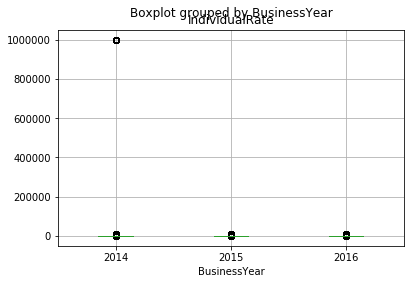

In [203]:
# Boxplot of insurance costs versus year and age 

insClean_df.boxplot(column = 'IndividualRate', by = 'BusinessYear')

(0, 550)

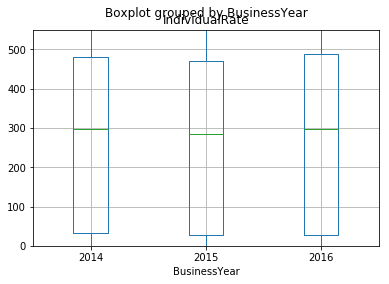

In [204]:
insClean_df.boxplot(column = 'IndividualRate', by = 'BusinessYear')

# limit the y axis to better see the datas.
plt.ylim(0, 550)

Over 2014 to 2016 median line shows in 2014 is about 300 dollars and in little bit dropped but in 2016 the returned to 300 dollars, then could say that not much changed during 2014 to 2016 and almost been the same.

/Users/maryammahmoodi/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



(0, 550)

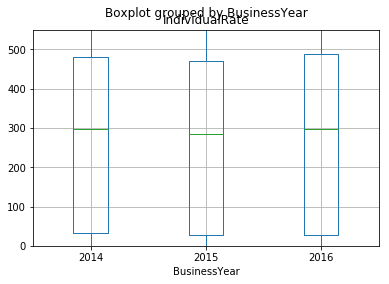

In [205]:
# deleting outlieres for 2014 
filt = -((insClean_df['BusinessYear'] == '2014') & (insClean_df['IndividualRate'] > 160))
insClean_df = insClean_df[filt]

# deleting outlieres for 2015
filt = -((insClean_df['BusinessYear'] == '2015') & (insClean_df['IndividualRate'] > 50))
insClean_df = insClean_df[filt]

# deleting outlieres for 2016
filt = -((insClean_df['BusinessYear'] == '2016') & (insClean_df['IndividualRate'] > 50))
insClean_df = insClean_df[filt]

insClean_df.boxplot(column = 'IndividualRate', by = 'BusinessYear')
plt.ylim(0, 550)

(0, 1000)

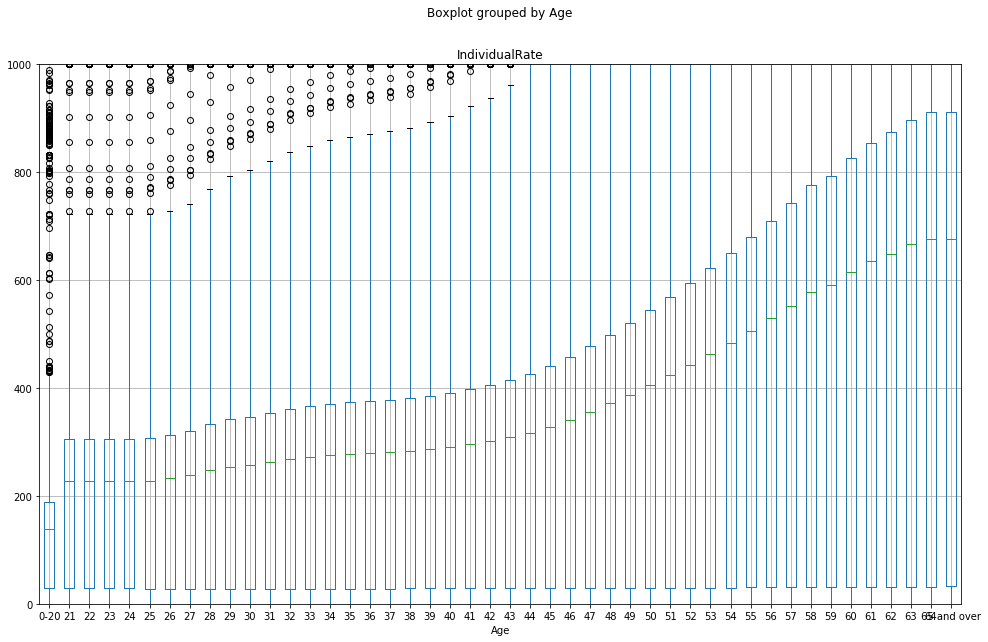

In [206]:
# Create the boxplot 
insClean_df.boxplot(column = 'IndividualRate', by = 'Age', figsize = (16, 10 ))
plt.ylim(0, 1000)

The insurance cost is increases as the age increases.
by look at the boxplot could say that the elder people paing about $200 more than younger people.

# Task C

In [207]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split # split the dataset into train set and test set
from sklearn.model_selection import GridSearchCV #cross validation to get more accuracy
from dateutil.parser import parse
from sklearn.metrics import accuracy_score as acc # to see how this model have performance
import matplotlib.pyplot as plt
import numpy as np

# Importing files


Data for this task is extracted based on the CSV file from [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package#weatherAUS.csv) into Jupyter notebook to prepare the data for further analysis.

The row data imported into this notebook in belongs only to Australia.

In [208]:
# The first step is to import the raw data file from ......
weather_data = pd.read_csv('weatherAUS.csv')
# shape shows the number of rows and columns for this data
weather_data.shape

(142193, 24)

In [209]:
# Highlevel view on weather_data Index
weather_data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [210]:
# down size the data
weather_data = weather_data.sample(n=10000)
weather_data.shape

(10000, 24)

In [211]:
# This is a big data need to choose only random samples 
weather_data = weather_data.sample(n=10000, random_state = 500)
weather_data.shape

(10000, 24)

# Data Wrangling

In [212]:
# Shows information about this data like unique rows and type of the data included in this file
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4936 to 47950
Data columns (total 24 columns):
Date             10000 non-null object
Location         10000 non-null object
MinTemp          9953 non-null float64
MaxTemp          9980 non-null float64
Rainfall         9902 non-null float64
Evaporation      5716 non-null float64
Sunshine         5198 non-null float64
WindGustDir      9367 non-null object
WindGustSpeed    9370 non-null float64
WindDir9am       9277 non-null object
WindDir3pm       9727 non-null object
WindSpeed9am     9895 non-null float64
WindSpeed3pm     9806 non-null float64
Humidity9am      9866 non-null float64
Humidity3pm      9749 non-null float64
Pressure9am      9017 non-null float64
Pressure3pm      9022 non-null float64
Cloud9am         6215 non-null float64
Cloud3pm         6021 non-null float64
Temp9am          9922 non-null float64
Temp3pm          9801 non-null float64
RainToday        9902 non-null object
RISK_MM          10000 non-null fl

In [213]:
# Describtion about the data
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,9953.000000,9980.000000,9902.000000,5716.000000,5198.000000,9370.000000,9895.00000,9806.000000,9866.000000,9749.000000,9017.000000,9022.000000,6215.000000,6021.000000,9922.000000,9801.000000,10000.00000
mean,12.181242,23.281924,2.316754,5.539416,7.577857,40.178122,14.03426,18.680706,68.664200,51.378500,1017.519219,1015.108690,4.464360,4.590600,17.025005,21.733619,2.36644
std,6.418530,7.166898,8.017115,4.481752,3.831092,13.660998,8.86600,8.702373,19.002207,20.918014,7.128691,7.050566,2.881912,2.710869,6.487849,6.995729,8.55596
min,-7.200000,-3.100000,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,1.000000,1.000000,987.300000,986.200000,0.000000,0.000000,-5.500000,-3.700000,0.00000
25%,7.600000,17.900000,0.000000,2.600000,4.600000,31.000000,7.00000,13.000000,57.000000,36.000000,1012.900000,1010.300000,1.000000,2.000000,12.300000,16.600000,0.00000
50%,12.000000,22.600000,0.000000,4.600000,8.400000,39.000000,13.00000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.700000,21.200000,0.00000
75%,16.800000,28.300000,0.800000,7.400000,10.700000,48.000000,19.00000,24.000000,83.000000,66.000000,1022.300000,1019.800000,7.000000,7.000000,21.600000,26.500000,0.80000
max,29.700000,46.500000,168.400000,77.300000,14.000000,122.000000,69.00000,78.000000,100.000000,100.000000,1040.400000,1037.700000,9.000000,8.000000,38.900000,45.900000,278.40000


In [214]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4936,2014-08-31,BadgerysCreek,9.7,21.9,0.0,NaN,NaN,E,26.0,SW,...,45.0,1021.4,1016.7,NaN,NaN,14.8,20.6,No,0.0,No
83074,2012-05-24,Brisbane,14.1,23.8,0.0,3.0,3.5,NNE,26.0,NaN,...,68.0,1023.5,1020.5,7.0,7.0,18.0,22.3,No,0.4,No
2342,2015-08-22,Albury,7.9,20.7,1.4,NaN,NaN,N,24.0,ESE,...,52.0,1017.8,1016.0,3.0,1.0,12.9,19.9,Yes,0.8,No
133078,2009-06-07,AliceSprings,4.6,17.5,0.0,4.0,10.3,SSW,33.0,WSW,...,39.0,1021.7,1018.1,2.0,1.0,10.2,16.9,No,0.0,No
133510,2010-08-13,AliceSprings,1.4,23.9,0.0,4.0,11.1,NNW,44.0,N,...,17.0,1017.5,1012.3,0.0,0.0,13.1,21.9,No,0.0,No


In [215]:
# drop all NaN rows and save on over the weather_data file
weather_data.dropna(axis = 0, inplace = True)
weather_data.shape

(3976, 24)

In [216]:
# check to see don't have any Nan in rows
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
133078,2009-06-07,AliceSprings,4.6,17.5,0.0,4.0,10.3,SSW,33.0,WSW,...,39.0,1021.7,1018.1,2.0,1.0,10.2,16.9,No,0.0,No
133510,2010-08-13,AliceSprings,1.4,23.9,0.0,4.0,11.1,NNW,44.0,N,...,17.0,1017.5,1012.3,0.0,0.0,13.1,21.9,No,0.0,No
116593,2014-06-08,PerthAirport,14.4,20.0,0.0,3.0,0.0,NNE,37.0,NNE,...,39.0,1018.6,1016.5,8.0,7.0,17.6,19.8,No,0.2,No
39721,2011-10-02,Williamtown,10.4,15.9,22.0,18.0,0.0,SSE,61.0,S,...,73.0,1010.9,1014.5,8.0,8.0,14.2,14.4,Yes,29.6,Yes
134025,2012-02-09,AliceSprings,13.2,34.6,0.0,11.4,12.9,SSW,52.0,E,...,9.0,1011.9,1007.8,0.0,1.0,26.4,33.5,No,0.0,No


In [217]:
# Deeply look at the date
for col in weather_data.columns:
    print(col, weather_data[col].nunique(), weather_data[col].dtype, sep = ' :: ')

Date :: 2247 :: object
Location :: 26 :: object
MinTemp :: 305 :: float64
MaxTemp :: 332 :: float64
Rainfall :: 180 :: float64
Evaporation :: 128 :: float64
Sunshine :: 141 :: float64
WindGustDir :: 16 :: object
WindGustSpeed :: 51 :: float64
WindDir9am :: 16 :: object
WindDir3pm :: 16 :: object
WindSpeed9am :: 31 :: float64
WindSpeed3pm :: 30 :: float64
Humidity9am :: 97 :: float64
Humidity3pm :: 100 :: float64
Pressure9am :: 378 :: float64
Pressure3pm :: 369 :: float64
Cloud9am :: 9 :: float64
Cloud3pm :: 9 :: float64
Temp9am :: 316 :: float64
Temp3pm :: 334 :: float64
RainToday :: 2 :: object
RISK_MM :: 189 :: float64
RainTomorrow :: 2 :: object


In [218]:
print(weather_data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


At this point need to drop some columns which I am not interested to have them. Such as Location, Date, ... because these are categorical objects and **logistic regression** doesn’t deal with categorical variable only takes numerical variable.

## Drop unwanted features

In [219]:
# drop categorical columns
weather_data.drop(['Location', 'Date', 'RISK_MM', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1, inplace = True)
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
133078,4.6,17.5,0.0,4.0,10.3,33.0,9.0,13.0,74.0,39.0,1021.7,1018.1,2.0,1.0,10.2,16.9,No
133510,1.4,23.9,0.0,4.0,11.1,44.0,17.0,17.0,37.0,17.0,1017.5,1012.3,0.0,0.0,13.1,21.9,No
116593,14.4,20.0,0.0,3.0,0.0,37.0,17.0,17.0,40.0,39.0,1018.6,1016.5,8.0,7.0,17.6,19.8,No
39721,10.4,15.9,22.0,18.0,0.0,61.0,31.0,35.0,78.0,73.0,1010.9,1014.5,8.0,8.0,14.2,14.4,Yes
134025,13.2,34.6,0.0,11.4,12.9,52.0,17.0,19.0,20.0,9.0,1011.9,1007.8,0.0,1.0,26.4,33.5,No


## Creat feature matrix and target vector

In [220]:
# split the file into two files as: 

# 1- creat predictor file
Maxtemp = weather_data['MaxTemp']
# 2- creat target file
Rainfall = weather_data['RainTomorrow']

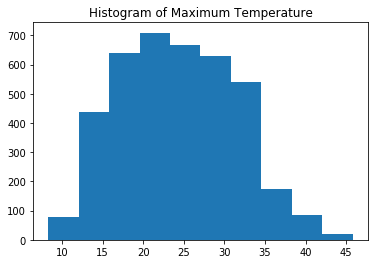

In [221]:
# Create histogram to show Maximum Temperature
plt.hist(Maxtemp)
plt.title("Histogram of Maximum Temperature")
plt.show()

Histogram above shows the maximum temperature which we can have ranintomorrow is around 20C.

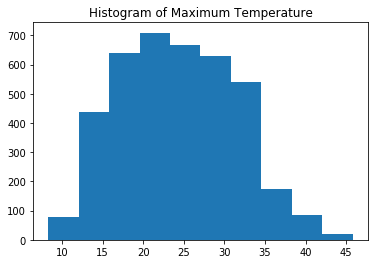

In [222]:
Mintemp = weather_data['MaxTemp']
Rainfall = weather_data['Evaporation']

# Create histogram to show Maximum Temperature
plt.hist(Maxtemp)
plt.title("Histogram of Maximum Temperature")
plt.show()

Histogram above shows the maximum temperature which we can have evaporation is more than 20C.

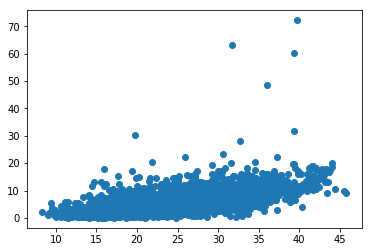

In [223]:
plt.scatter(Maxtemp, Rainfall)
plt.show()

The scatter plot above shows that the corelation between the maximum temperature and rain fall, the possibility to get rain tomorrow is high when the temperature is more than 32C. It is linear positive ralationship.

In [224]:
Humidity9am = weather_data['Humidity9am']
Pressure9am = weather_data["Pressure9am"]

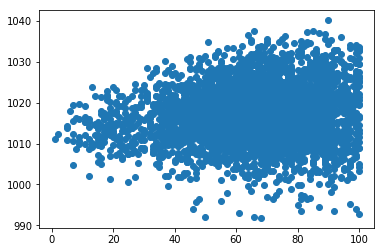

In [225]:
# Create scatter plot to show Humidity 
plt.scatter(Humidity9am, Pressure9am)

The scatter plot above shows that the corelation between the Humidity9am and ressure9am in Australia. This plot shows in low humidity still have atmospheric pressure but by increase the humidity between 40 to 100 the presure will increase very slowly too. 

# Prediction

In [226]:
# create predictor file ( Numerical)
X = weather_data.drop('RainTomorrow', axis = 1)
# create target file ( Categorical)
y = weather_data['RainTomorrow']

In [227]:
# Split predict and target with same constant 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 500)

In [228]:
# predict train
x_train.shape

(2982, 16)

In [229]:
# target train
y_train.shape

(2982,)

In [230]:
# predict test
x_test.shape

(994, 16)

In [231]:
# target test
y_test.shape

(994,)

## Model- Logistic Regression

For prediction I used Logistic Regression from the library which called **sklearn.linear_model**

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
# lr is a short name for LogisticRegression
model_lr = LogisticRegression()

For optimal accuracy need to use parameter grid. Inside logistic regression there are lots of parameters has been buit in which we use two of them as a "penalty" and "c" that can optimise the values and bring the accuracy high.

In [234]:
# optimisation of the model by taking two parameters of the model
param_grid = {'penalty':['l1', 'l2'],
              'C':[.1, .01, .001, .0001]}

In [235]:
# cross validation used to take the accuracy up and give us more confidence for getting good accuracy
# cv = 5 means cross validation has been repeated 5 times to get more accurate results
# verbos performing is lock somewhere during performing, we need to see the best 3 performing parameters
model_lr_gs = GridSearchCV(model_lr, param_grid=param_grid, n_jobs=-1, cv=5, verbose = 3)

In [236]:
# Fitting is for folds 5 times for each of 8 candidates, totalling 40 fits to get a better and higher accuracy
model_lr_gs.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.8s finished
/Users/maryammahmoodi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [242]:
# shows the best parameters which I can have
model_lr_gs.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [243]:
# shows the accuracy 
model_lr_gs.best_score_

0.8514419852448022

In [244]:
# predict function for validation part (x_test =997 record) which could not seen in the model
lr_prediction = model_lr_gs.predict(x_test)
# rain tomorrow prediction file
lr_prediction

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Y

In [245]:
# find accuracy from logestic regresion model 
accuracy = acc(y_test,lr_prediction)

In [246]:
print("The accuracy of the logestic regression model is " + str(round((accuracy * 100),1)) + "%.")

The accuracy of the logestic regression model is 84.9%.
